# Week 7 - HMM Implementation

In [2]:
%matplotlib inline
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

hr = np.array([55, 55, 54, 53, 52, 51, 50, 49, 49, 49, 49, 49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 48, 49, 54, 54, 54, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 47, 49, 54, 54, 54, 45, 45, 45, 50, 50, 50, 47, 46, 45, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 46, 47, 50, 50, 50, 46, 45, 44, 43, 43, 43, 43, 43, 43, 43, 44, 45, 52, 52, 52, 49, 48, 47, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 45, 46, 45, 46, 47, 54, 54, 54, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 47, 47, 47, 47, 47, 47, 48, 48, 48, 47, 46, 45, 45, 45, 63, 63, 48, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 46, 47, 48, 49, 49, 49, 42, 42, 42, 42, 42, 42, 46, 49, 52, 58, 58, 58, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 47, 49, 49, 49, 47, 46, 45, 45, 45, 45, 56, 56, 56, 49, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 45, 45, 45, 49, 49, 49, 49, 49, 49, 43, 43, 43, 44, 44, 44, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 49, 49, 49, 45, 45, 45, 52, 52, 52, 46, 45, 44, 44, 44, 44, 45, 45, 45, 45, 46, 47, 47, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 46, 46, 46, 48, 48, 48, 47, 47, 47, 47, 48, 49, 50, 50, 50, 48, 48, 48, 49, 49, 49, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 46, 46, 46, 44, 44, 44, 48, 48, 48, 47, 46, 45, 45, 45, 45, 46, 46, 46, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 54, 54, 54, 43, 43, 43, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 43, 43, 43, 43, 43, 43, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 47, 49, 51, 54, 54, 54, 46, 46, 46, 47, 47, 47, 46, 46, 46, 47, 47, 47, 45, 45, 45, 49, 49, 49, 44, 44, 44, 46, 46, 46, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 51, 51, 51, 45, 45, 45, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 48, 50, 55, 55, 55, 48, 47, 46, 46, 46, 46, 47, 47, 47, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 49, 50, 53, 53, 53, 50, 50, 50, 53, 53, 53, 50, 49, 48, 48, 48, 48, 69, 69, 69, 62, 58, 54, 50, 50, 50, 50, 50, 50, 50, 50, 50, 53, 53, 53, 49, 49, 49, 50, 51, 52, 55, 55, 55, 52, 51, 50, 50, 50, 50, 50, 50, 50, 59, 59, 67, 67, 68, 68, 68, 60, 60, 60, 95, 95, 95, 90, 90, 90, 114, 125, 136, 144, 144, 144, 136, 135, 134, 134, 134, 134, 145, 145, 145, 127, 127, 127, 131, 135, 139, 147, 147, 147, 133, 128, 123, 125, 121, 117, 106, 106, 106, 126, 132, 138, 136, 138, 140, 141, 141, 141, 139, 139, 139, 140, 141, 142, 141, 142, 143, 155, 155, 155, 153, 152, 151, 148, 148, 148, 156, 156, 156, 154, 152, 150, 149, 148, 147, 146, 145, 144, 142, 141, 140, 139, 139, 139, 139, 139, 139, 143, 143, 143, 142, 141, 140, 139, 139, 139, 139, 139, 139, 142, 143, 144, 145, 145, 145, 125, 125, 125, 147, 147, 147, 146, 144, 142, 136, 136, 136, 142, 142, 142, 142, 142, 142, 133, 126, 119, 113, 107, 101, 94, 94, 94, 94, 95, 96, 95, 100, 105, 132, 136, 140, 140, 140, 140, 139, 136, 133, 126, 126, 126, 141, 142, 143, 143, 143, 143, 143, 144, 145, 145, 147, 149, 153, 153, 153, 132, 120, 108, 91, 91, 91, 91, 98, 105, 128, 135, 142, 142, 142, 142, 138, 136, 134, 134, 134, 134, 144, 145, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 149, 149, 149, 146, 146, 146, 147, 148, 149, 153, 153, 153, 153, 153, 153, 152, 151, 150, 150, 149, 148, 149, 147, 145, 132, 125, 118, 114, 114, 114, 140, 140, 140, 138, 135, 132, 127, 123, 119, 117, 115, 113, 114, 111, 108, 100, 100, 100, 100, 100, 100, 98, 98, 98, 105, 105, 105, 105, 105, 105, 112, 112, 112, 101, 97, 93, 91, 91, 91, 104, 104, 104, 99, 99, 99, 99, 103, 107, 134, 134, 134, 133, 133, 133, 133, 135, 137, 147, 147, 147, 144, 144, 144, 151, 151, 151, 149, 148, 147, 146, 146, 146, 146, 146, 146, 145, 138, 131, 115, 112, 109, 109, 109, 88, 88, 81, 81, 81, 85, 90, 95, 106, 106, 106, 84, 84, 84, 94, 98, 102, 103, 103, 103, 78, 74, 70, 70, 70, 70, 78, 78, 78, 78, 77, 76, 74, 74, 74, 75, 75, 75, 75, 75, 75, 93, 93, 93, 83, 83, 83, 85, 85, 71, 71, 63, 63, 63, 79, 79, 79, 66, 63, 60, 60, 60, 60, 60, 61, 62, 63, 63, 63, 62, 62, 62, 63, 64, 65, 65, 65, 65, 62, 62, 62, 69, 72, 75, 72, 76, 80, 96, 96, 96, 96, 96, 96, 96, 96, 96, 86, 81, 76, 74, 71, 68, 66, 64, 62, 63, 62, 61, 60, 60, 60, 60, 62, 64, 76, 76, 76, 70, 68, 66, 65, 65, 65, 71, 71, 71, 71, 69, 67, 62, 62, 62, 74, 74, 74, 74, 74, 74, 74, 72, 70, 66, 65, 64, 64, 64, 64, 80, 84, 88, 88, 88, 88, 88, 88, 88, 82, 79, 76, 78, 75, 72, 65, 64, 63, 63, 63, 63, 64, 64, 64, 63, 63, 63, 63, 63, 63, 64, 64, 64, 65, 65, 65, 63, 63, 63, 66, 72, 78, 94, 94, 94, 92, 92, 92, 92, 92, 92, 83, 83, 83, 88, 88, 88, 81, 78, 75, 74, 74, 74, 75, 75, 75, 71, 69, 67, 68, 67, 66, 67, 66, 65, 62, 62, 62, 65, 65, 65, 65, 64, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 62, 65, 68, 77, 77, 77, 58, 58, 58, 58, 62, 66, 89, 89, 89, 88, 88, 78, 78, 78, 78, 78, 60, 60, 60, 60, 60, 60, 56, 56, 56, 57, 57, 57, 55, 55, 55, 55, 56, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59, 58, 58, 58, 58, 58, 58, 60, 60, 60, 59, 58, 57, 56, 56, 56, 61, 61, 61, 59, 59, 59, 62, 62, 62, 62, 61, 60, 59, 59, 59, 76, 76, 76, 76, 73, 70, 57, 57, 57, 59, 59, 59, 59, 59, 59, 56, 56, 56, 62, 62, 62, 59, 57, 55, 54, 54, 54, 55, 56, 57, 56, 57, 58, 60, 60, 60, 56, 56, 56, 62, 66, 70, 77, 77, 77, 66, 62, 58, 58, 58, 58, 58, 58, 58, 57, 56, 55, 54, 54, 54, 54, 55, 56, 56, 57, 58, 59, 60, 61, 61, 61, 61, 55, 55, 55, 58, 58, 58, 56, 56, 56, 58, 61, 64, 69, 69, 69, 55, 55, 55, 68, 68, 68, 58, 57, 56, 56, 56, 56, 55, 55, 55, 56, 59, 62, 68, 68, 68, 66, 64, 62, 58, 56, 54, 54, 54, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 60, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 61, 62, 66, 66, 66, 59, 58, 57, 58, 57, 56, 55, 55, 55, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 60, 61, 66, 66, 66, 63, 62, 61, 60, 60, 60, 62, 62, 62, 59, 59, 59, 59, 59, 59, 61, 61, 61, 59, 59, 59, 59, 60, 61, 66, 70, 74, 82, 82, 82, 55, 55, 55, 55, 55, 55, 56, 57, 58, 57, 61, 65, 82, 82, 82, 59, 56, 53, 53, 53, 53, 53, 54, 55, 56, 56, 56, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 62, 62, 62, 62, 61, 60, 57, 57, 57, 68, 68, 68, 63, 63, 63, 63, 63, 63, 60, 60, 60, 65, 65, 65, 62, 62, 62, 66, 66, 66, 63, 63, 63, 71, 71, 71, 60, 60, 60, 60, 60, 60, 59, 59, 59, 61, 61, 61, 57, 57, 57, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 63, 63, 63, 61, 61, 61, 62, 62, 62, 62, 61, 60, 59, 59, 59, 60, 60, 60, 59, 59, 59, 58, 58, 58, 57, 57, 57, 57, 57, 57, 59, 60, 61, 61, 61, 61, 60, 60, 60, 59, 59, 59, 61, 62, 63, 63, 63, 63, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 62, 63, 62, 63, 64, 89, 89, 89, 81, 78, 75, 74, 74, 74, 79, 81, 83, 83, 83, 83, 83, 81, 79, 73, 70, 67, 64, 64, 64, 64, 64, 64, 62, 62, 62, 65, 65, 65, 64, 64, 64, 63, 63, 63, 64, 64, 64, 62, 61, 60, 60, 60, 60, 61, 64, 67, 70, 74, 78, 83, 83, 83, 60, 60, 60, 63, 63, 63, 61, 61, 61, 69, 69, 69, 64, 63, 62, 62, 62, 62, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 60, 60, 60, 58, 58, 58, 61, 62, 63, 63, 65, 67, 74, 74, 74, 67, 67, 67, 69, 73, 77, 80, 86, 92, 104, 104, 104, 95, 90, 85, 81, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 76, 74, 71, 71, 71, 73, 73, 73, 68, 65, 62, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 58, 54, 54, 54, 59, 59, 59, 57, 57, 57, 57, 57, 57, 58, 58, 58, 57, 57, 57, 57, 57, 57, 58, 59, 60, 61, 61, 61, 57, 57, 57, 59, 59, 59, 58, 58, 58, 58, 58, 58, 52, 52, 52, 70, 70, 70, 70, 70, 70, 67, 66, 65, 64, 63, 62, 63, 62, 61, 54, 54, 54, 57, 57, 57, 57, 57, 57, 56, 55, 54, 52, 52, 52, 56, 56, 56, 56, 56, 56, 55, 55, 55, 61, 61, 61, 61, 61, 61, 64, 65, 66, 67, 67, 67, 50, 49, 48, 48, 48, 48, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 50, 50, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 52, 52, 53, 54, 55, 56, 57, 60, 60, 60, 56, 55, 54, 55, 54, 53, 52, 52, 52, 56, 56, 56, 53, 53, 53, 53, 53, 53, 53, 53, 53, 58, 58, 58, 50, 50, 50, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 49, 49, 49, 49, 49, 49, 50, 52, 54, 60, 60, 60, 50, 49, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 48], dtype=np.float)

#### (1) Load the data from HMMobs.csv and plot the observations.

You'll need to figure out an time axis vector for the data (it was recorded starting from midnight at even intervals over 24 hours).

1974


Text(0.5, 1.0, 'Heart Rate of a person throughout the day')

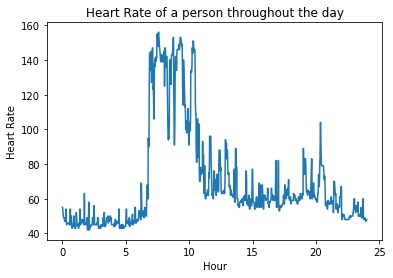

In [3]:
# Answer
print(len(hr))
t = np.linspace(0,24,len(hr))

plt.plot(t, hr)
plt.xlabel('Hour')
plt.ylabel('Heart Rate')
plt.title('Heart Rate of a person throughout the day')

#### (2) Do you see regions where there might be differences in behavior?

Yes. From midnight to around 7am, the person appear to be sleeping, indicated by his low heart rate. Afterwards, he goes for a morning exercise for about 3 hour until 10am, indicated by his high heart rate. Eventually, he goes on with his normal activity considering his medium heart rate.

#### (3) Based on when you might expect someone would be asleep, plot the histogram of resting heart rate values.

The simplest emissions to use with `hmmlearn` are Gaussian ones. If our emissions are not Gaussian, we can still transform our data in some way to make it look more like a normal distribution. Given the shape of this distribution, do you think any transformation of the data would be helpful? Justify your answer.

Text(0.5, 1.0, 'Heart Rates of a Sleeping Person with Log Transformation')

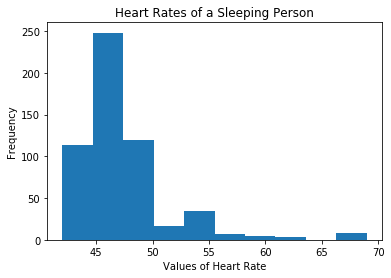

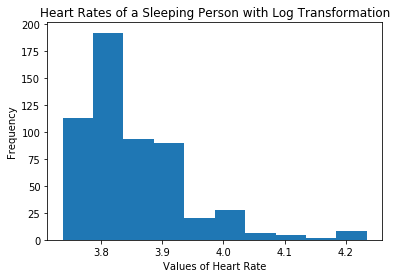

In [4]:
# Answer
countSleep = 0

for i in np.arange(0,len(hr)): #for loop to find when is the person sleeping. 
    if(hr[i]) < 80 and t[i]<8:
        countSleep = countSleep+1 #return a counter that tells you which index the person is sleeping

sleep = np.zeros(countSleep)
for i in np.arange(0,countSleep):
    sleep[i] = hr[i]

plt.hist(sleep)
plt.xlabel("Values of Heart Rate")
plt.ylabel('Frequency')
plt.title('Heart Rates of a Sleeping Person')    

plt.figure()
plotSleep = np.log(sleep)
plt.hist(plotSleep)
plt.xlabel("Values of Heart Rate")
plt.ylabel('Frequency')
plt.title('Heart Rates of a Sleeping Person with Log Transformation')


A log transformation would be helpful because it helps make the data looks more of a normal distribution. Data is then easier to deal with because it's familiar with the normal distribution. This also helps when implementing the HMM model.

#### (4) One way to deal with noisy data is to use a moving average. Plot the moving average of the data for two different windows. How does this help visualize the data? What is lost using this approach?

Text(0.5, 1.0, 'Moving Average of Heart Rates data')

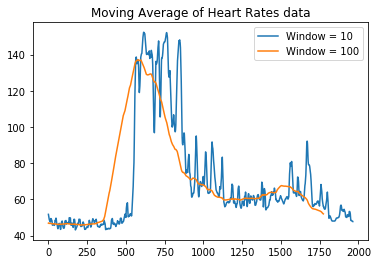

In [5]:
# Answer

def movingaverage(data,window):
    weights = np.repeat(1.0, window) / window
    mavg = np.convolve(data, weights,'valid')
    return mavg

plt.plot(movingaverage(hr,10), label = 'Window = 10')
plt.plot(movingaverage(hr,200), label='Window = 100')
plt.legend()
plt.title("Moving Average of Heart Rates data")

Moving average kinda looks like taking the average of the noise. This help visualize the data by reducing the noise, since it's an unwanted entity in our data. The accuracy of the data is reduced with more windows as you cut down more information.

#### (5) We're going to fit an HMM model to this data with three underlying states. This involves three sets of parameters about the model—describe each briefly.

Initial probability: a starting point for us to move forward with. An initial probability is the probability for the first occurence in your model / sequence. 

Transition probability: the probability of an occurence given the previous known condition. An instance of transition probability is p(H|S-1 = k) means the probability of getting H given that your previous occurence is k.

Emission: the output of the HMM. This is the observable / output value from your HMM.

#### (6) Fit an HMM model with Gaussian emissions to the data. Use any transformations as necessary.

How does the model respond to rapid state changes? Overlay the raw measurements and HMM state over time.

[[ 47.10528933]
 [110.43860881]
 [ 60.09627995]]
[2 2 2 ... 0 0 0]


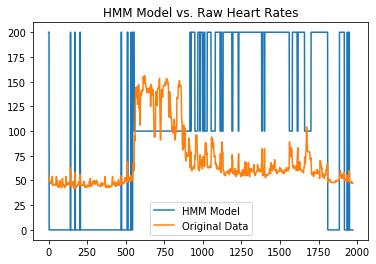

In [10]:
# Answer
modelPred = GaussianHMM(n_components=3, n_iter=10000, tol=0.00001)
hrshp = hr.reshape(-1,1)

fit = modelPred.fit(hrshp)
hrshpPred = modelPred.predict(hrshp)
print(modelPred.means_)

print(hrshpPred)
plt.plot(hrshpPred*100, label = 'HMM Model')
plt.plot(hr, label = 'Original Data')
plt.title('HMM Model vs. Raw Heart Rates')
plt.legend()


The model does not respond as productive. A productive model would differentiate the 3 different regions: sleeping, workout, activity. It did do a good job of looking at the value of a heart rate and predicting which region it is in. But for our purposes, I think it's unnecessarily sensitive

#### (7) From the HMM model determine, with a confidence interval, when the patient woke up in the morning. Compare this prediction to the data you obtain with the moving average.

Hint: `model.predict_proba(X)` can give you the probability of being in each state at each time point.

In [25]:
# Answer
stateP = modelPred.predict_proba(hrshp)
schlafen = stateP[:,0]
exercise = stateP[:,1]
activity = stateP[:,2]

for i in np.arange(0,len(schlafen)):
    if schlafen[i] < 0.03 and exercise[i] > 0.97:
        print("Sleeping probability = ", schlafen[i])
        print("Wake up time = ", i*24/len(schlafen))
        break

stateMoving = modelPred.predict_proba(movingaverage(hr,200).reshape(-1,1))
sleepMoving = stateMoving[:,0]
exerciseMoving = stateMoving[:,1]
activityMoving = stateMoving[:,2]

for i in np.arange(0,len(schlafen)):
    if sleepMoving[i] < 0.03 and exerciseMoving[i] > 0.97:
        print("Sleeping probability with moving average = ", sleepMoving[i])
        print("Wake up time with moving average = ", i*24/len(sleepMoving))
        break



Sleeping probability =  4.1178081319652114e-84
Wake up time =  6.759878419452887
Sleeping probability with moving average =  8.131671073342148e-22
Wake up time with moving average =  5.543661971830986


Wake up time of 6.7599 in the model refers to 6.45AM, and wake up time of 5.5437 in the model with the moving average window of 200 refers to 5.32AM. Since I set the probability of someone being considered sleeping relatively low (0.03), I get my confidence interval of 97%. Using the moving average, the model actually is not better off. This may be caused by the fact that when you take the moving average of the data, you won't get as much noise and thus it's less likely for the data to reach my sleeping threshold.

#### (8) Describe one form of other information you could use from a smart watch to make a more accurate determination of the user's state.

How would you use that in your model?

You can use an accelerometer that detects movement. When your HMM model heart rate indicates that the individual is sleeping, it can be coupled with an accelerometer reading. If the accelerometer detects no movement for about 1 minute straight, it can be a "confirmation" system that the person is indeed sleeping.